In [11]:
import numpy as np
import pandas as pd


In [12]:
df = pd.read_csv('/content/placement.csv')

In [13]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [14]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [15]:
# The 	Unnamed: 0  cloumn in our data was unnecessayy so we preprocessed it
df = df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [16]:
# Steps

#0. Preprocessing + EDA + Feature Selection
#1. Extract input and output columns
#3. Scale the values
#3. Train test splits
#4. Train the model
#5. Evaluate the model / Model Selection
#6. Deploy the model


In [17]:
# Data precrocesed
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [18]:
# EDA
import matplotlib.pyplot as plt


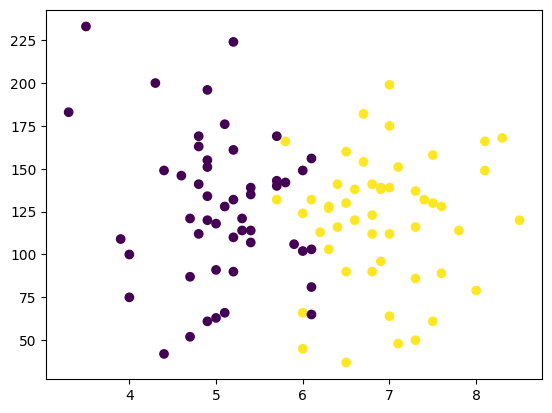

In [20]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [21]:
# Extracting Input and Output columns
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [22]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [23]:
Y.head()

,placement
0,1
1,0
2,0
3,1
4,0


In [24]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [25]:
X_train

,cgpa,iq
78,6.1,81.0
63,6.3,128.0
99,6.2,113.0
41,5.4,114.0
67,5.0,118.0
...,...,...
48,6.6,138.0
81,5.4,107.0
2,5.3,121.0
4,5.8,142.0


In [26]:
X_test

,cgpa,iq
60,6.9,139.0
47,5.2,161.0
71,6.1,132.0
77,7.3,50.0
72,7.3,116.0
65,8.1,166.0
79,6.5,90.0
84,5.7,169.0
24,4.7,121.0
54,6.4,141.0


In [27]:
Y_train

,placement
78,0
63,1
99,1
41,0
67,0
...,...
48,1
81,0
2,0
4,0


In [28]:
Y_test

,placement
60,1
47,0
71,1
77,1
72,1
65,1
79,1
84,0
24,0
54,1


In [30]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
X_train

array([[ 1.36961062e-01, -1.04557907e+00],
       [ 3.11804971e-01,  1.23545822e-01],
       [ 2.24383017e-01, -2.49579143e-01],
       [-4.74992620e-01, -2.24704145e-01],
       [-8.24680438e-01, -1.25204155e-01],
       [-1.17436826e+00,  5.71295779e-01],
       [-9.12102393e-01, -7.54541595e-02],
       [ 4.95391076e-02,  6.45920772e-01],
       [-5.62414575e-01, -2.24704145e-01],
       [ 2.06024406e+00,  1.11854573e+00],
       [-6.49836529e-01, -3.24204136e-01],
       [-9.99524347e-01,  1.14342073e+00],
       [ 1.36961062e-01,  8.20045756e-01],
       [-1.34921217e+00, -2.01570398e+00],
       [ 1.88540015e+00,  6.45920772e-01],
       [ 4.86648881e-01,  9.19545746e-01],
       [ 1.36961062e-01, -1.44357903e+00],
       [ 1.44829038e+00, -8.46579086e-01],
       [ 9.23758653e-01,  3.97170796e-01],
       [ 9.23758653e-01, -2.74454141e-01],
       [-1.08694630e+00, -1.76695400e+00],
       [ 1.62313429e+00, -2.24704145e-01],
       [-2.13600976e+00,  2.73542057e+00],
       [ 6.

In [32]:
X_test

array([[ 0.8363367 ,  0.3971708 ],
       [-0.64983653,  0.94442074],
       [ 0.13696106,  0.22304581],
       [ 1.18602452, -1.81670399],
       [ 1.18602452, -0.17495415],
       [ 1.88540015,  1.06879573],
       [ 0.48664888, -0.82170409],
       [-0.21272676,  1.14342073],
       [-1.0869463 , -0.05057916],
       [ 0.39922693,  0.44692079]])

In [33]:
# Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [34]:
# Evaluating the model


In [38]:
# The the Machine Evaluate the accuracy of how accurately our model was trained
Y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)               # 1.0 means our model was trained perfectly with 100% accuracy

1.0

<Axes: >

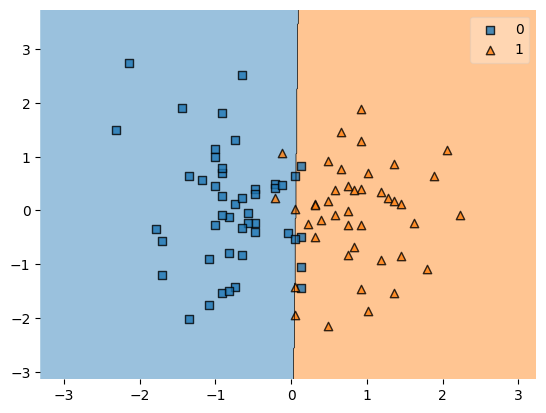

In [41]:
# Seeing How our model made the decision boundary..
# How our Logistic Regression made a decision line to classify the data
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X_train, y=Y_train.values, clf=model)

In [42]:
import pickle

In [43]:
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')